# Project Phase IV :  Citibike Project Final Draft


This project aims to answer the question **How is citibike representing NYC demographics? (in 2017)**. (Edit)

This notebook contains the **Draft of the Final Project**

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

#### Team Github
- https://github.com/shljessie/citibike-nyc

#### Team Raw Data Google Drive 
- https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk 

#### Team Final Data Google Drive 
- https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing
<br/> 

_______________


## Contents of this Notebook

1. Introduction (Seong Hee)
2. Data Description (Seong Hee, Link to data cleaning
3. Pre Registration Statement (Seong Hee) 
4. Data Analysis (Nicholas finish the thing at bottom, Chelsea adds her part)
5. Evaluation of Significance  
6. Interpretation and Conclusion (Chelsea)
7. Limitations (Chelsea)
8. Source Code
9. Acknowledgement (Seong Hee) 
10. Appendix (Seong Hee) 
11. Questions for Reviewers (Seong Hee)
<br/> 
_______________

## 1) Introduction

1. Context of Work
2. Research Question
3. Main Findings
4. Summary of Results


#### 1. Context of Work

Bike Sharing comes with many benefits such as providing free or affordable access to bicycles for short-distance trips. By doing so in an urban area, this reduces congestion, noise, and air pollution. 

However **whether or not these bike sharing systems are truly accessible for all is questionable.** Since the accessibility of these bike sharing systems depend heavily on where the stations are located, it is very likely that where you live becomes the deciding factor in whether or not you will be able to use these bikes. 

In coming up with our research question, we looked at many research papers on bike sharing system equity. 
For example, a [study done by Portland State University](https://trec.pdx.edu/research/project/884) suggests that significant portions of the population are underrepresented among bike share users, including people of color, along with lower-income, female, older adults and less-educated groups. An [article in 2017](https://usa.streetsblog.org/2017/07/05/whats-keeping-people-from-using-bike-share-new-study-breaks-it-down-by-race-and-income/) finds that this may be due to the fact that these low-income communities and people of color view traffic risk, high prices, and the potential for crime and harassment as the biggest barriers to bicycling and using bike-share in their neighborhoods. There has also been [data visualization research at MIT](https://aberke.github.io/income-race-bikes/) about how bikes are being distributed in NYC throughout the years in accordance to race&income.

In this project, **we look into how citibike stations are distributed in NYC** and how that relates to the following factors: 1) race&income and  2) citibike usage. Are there more stations in areas of higher usage regardless of race and income? Does race and income seem to have an unignorable correlation with how citibike stations are being distributed? How much of these factors play into the distribution of citibike? How might citibike station distribution be improved? These are the questions we will ask and attempt to answer throughout this project.
 
Through gaining insight on how citibike stations are distributed in NYC, we will attempt to gain insight into what NYC can do to improve the distribution of citibike to reflect the race/income and usage demographics. 

#### 2. Research Question

How is citibike representing NYC demographics? (in 2017).

#### 3. Project Design + Limitations 

We are specificially looking at **NYC citibike trip data in 2017 as a sample** of the representation of NYC bike stations around New York. We chose New York City's citibike system since New York City is an area where there are widely varying levels of income. We chose 2017 for two reasons,    1) NYC's race and income data was avaiable for the years 2013 -2018 and 2) 2017 was a year when many new stations of citibike where added to represent its overall usage.
We decided that 2017 would be a fair representation of how citibike stations were distributed throughout NYC.

We chose geoid as our standard for breaking up NYC into different geographical areas, since a geoid is the unique indentifier for a census tract, and a census tract is the smallest geographic region which the US goverment collects race and income data on during its annual Census. A census tract is roughly equivealnt to a neighborhood, and they generally encompass a population between 2500 to 8000 people. 

#### 4. Main Findings

#### 5. Summary of Results
<br/> 

_______________

## 2) Data Description 

For this project we used 3 different data sets. 
1. Citibike Trip Data
2. Citibike Station Data
3. NYC Race and Income Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### Dataset 1: Citibike Trip Data

In [2]:
trips_df = pd.read_csv('../data/citibike_trip_final.csv')
print('Number of Rows: {}'.format(trips_df.shape[0]))
print('Number of Columns: {}'.format(trips_df.shape[1]))
trips_df.head()

Number of Rows: 14049057
Number of Columns: 9


,start_time,stop_time,start_station_name,end_station_name,birth_year,gender,start_station_geoid,end_station_geoid,trip_minutes
0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,1965.0,2,3.606102e+10,3.606101e+10,11
1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,1987.0,2,3.606100e+10,3.606101e+10,21
2,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,1973.0,1,3.606101e+10,3.606101e+10,9
3,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,1977.0,2,3.606101e+10,3.606100e+10,13
4,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,1989.0,1,3.604700e+10,3.604702e+10,4


##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citibike in 2017. The following are the features that are recorded for each trip: 
- start_time: Datetime object for the start time and date of the trip
- stop_time: Datetime object for the end time and date of the trip
- start_station_name: Name of starting station of the trip, a string
- end_station_name: Name of ending station of the trip, a string
- gender: (Zero=unknown; 1=male; 2=female)
- birth_year: Year user was born, an integer
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer. 

##### 2. Why was this dataset created?

This dataset was created to help developers, engineers, statisticians, artists, academics and the local public to explore the usage of citi bike around New York City. Insights from these findings would help citibike officials find answers to questions like where citibike users ride, how far they go,and what stations are the most popular. It is an open dataset on the public bike sharing system of New York City. It is open to the public to help people find insights about this system.

##### 3. Who funded the creation of the dataset?

This citibike data was funded by citibike in New York. Lyft is the operator of the Citi Bike program in New York City and Jersey City. The raw dataset was collected from this source https://www.citibikenyc.com/system-data 

##### 4.What processes might have influenced what data was observed and recorded and what was not?

Trips that may have been taken by staff who are managing citibike throughout the city are not good representations of citibikes trips by users only. Bikes may have been relocated overnight so that the distribution of bikes around the city are evenly distributed. Also bikes that may have been broken may lead to a loss of data.  Also citibike usage trip data is not a complete representation of all bike rider data in New York. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

This dataset required minimal preprocessing, because the citibike dataset is already pretty well proccessed. However the original table has spaces in its column names, so we decided to change these with underscores to make the more friendly for computation. Additionally we dropped columns that we would not be using in our analysis, and also removed rows that had NaN values in them. Furthermore, since the original trips dataset was very large we chose to only consider trips taken by users who are citibike subscribers, in order to reduce the size of the dataset. Deciding to only keep trip data for subscribers also makes sense since, more then 90% of the original trips were taken by subscribers, so removing trips taken by non-subscribers should not have resulted in any significant loss of data. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for using citibike, these users are allowing for citibike to take data of their usage. 
Citibike releases information about the user’s ride and trip duration  including their start station, usertype(Subscriber, one time user), gender, and year of birth. Citibike plans on using this data to understand citi bike users and the overall trend of citi bike users in new york city. Though many citibike users might not have been aware of this, they could have assumed that the data was collected to understand the citibike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing


### Dataset 2 : Citibike Stations Data

In [3]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset: 

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string 
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float 
- first_trip: Date of the first trip ever taken from the station, DateTime object 
- last_trip: Date of the last trip taken from the station (at the time this data set was downloaded), DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer 
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer 
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer

##### 2. Why was this dataset created?

The base dataset for this table came from the same source as the Citbike trip data set described above. However, more processing was done to this data to obtain this station dataset by a team of MIT researchers who were trying to map out the locations of Citi Bike stations in NYC for their research purposes. 

##### 3. Who funded the creation of the dataset?

This table uses as its base table the Cibike trip data set that was funded by citibike in New York. However, the processing that was done to this raw citi bike data was done by MIT researchers, so it can be assumed that MIT indirectly funded the creation of this Citibike trip data set. MIT Media Lab research: https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike


##### 4.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts, in which case we decided to select the first census tract returned by the API. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?¶

The original citibike station data, was already well formatted, but did not include the geoid which we needed to identify, which geographic location does the station belong to. To obtain this geoid for each station, we used an API to obtain the goid corresponding to the census tract to with the station is located in. Next since our project focuses on 2017, we removed all stations that had its first trip after 2017 since this means that these stations were made after 2017, and thus are not relevant to our analysis. Furthermore, the original dataset had the number of trips from each station calculated up to 2019, thus we removed this column and used the trip dataset to calculate the number of trips taken to and from each station in 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Since this data set is derived from the citi bike trips dataset, citi bike users were made aware that citibike would be tracking their usage data, when users signed up for the application. 

The expected usage of this data is the same as for the Citi Bike trip data above. 


##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [4]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4787
Number of Columns: 8


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races
0,36001000100,27250,1939,502,1142,16,112,167
1,36001000200,24091,4731,710,3474,104,32,411
2,36001000300,33454,5558,2589,1539,559,291,580
3,36001000401,74255,2459,2183,131,92,28,25
4,36001000403,70815,4695,3256,714,416,79,230


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. A census tract is the smallest geographical area, defined by the US goverment, which census data is collected on. For each census tract the following are the attributes in the dataset. 

- geoid: Unique identifier for the census tract that the station is located in, an integer 
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in that tract from 2017. This was done by extracting the household median income and household race from the American Community Survey. 

##### 3. Who funded the creation of the dataset?

This data was created and funded by the United States Census bureau. ACS: https://data.census.gov/cedsci/The creation of this dataset was funded by the MIT Media Lab. MIT Media Lab : https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv.

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process is performed by randomly selecting 3.5 million addresses to reply to the survey in order to represent the entire population. Because this survey is limited to those with addresses, there may be households and individuals who are not recorded in the census. For example, the homeless population is difficult to track and therefore could influence the data as well. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?
Because the original data from the American Community Survey was downloaded as a shapefile, the data had to be extracted and transformed into a dataframe. After extracting the race, income, and renaming the columns, the data set was created. 

Next, we dropped rows where the median income was missing or had NaN values. Furthermore for census tracts that had median income values of '$250,000+' we changed the median income value to '250,000' so that they can be treated as a numeric value. Laslty, we only kept the race and income data for 2017 and dropped all the other columns which correspond to the other years. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
The individuals contacted were aware of the data collection. In the constitution, it states that a census must be taken every 10 years. People likely understand the main purpose of the census as determining where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency. 

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

## 3) Preregistration Statement 

##### Analaysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

If citibike is fairly distributing its bicycles then the census tracts with the most stations, should also be the ones with the highest demand. We want to see wether this is true. 
- Compute the trips and number of stations in each census tract and see how this differs across census tracts. 
- Normalize the number of trips taken in a census tract by the population size (perhaps we don't need this since we want to see if stations match demand so no need to normalize by population)
- Compute Linear Regression to see how strongly the number of stations correlate with the number of trips taken from the census tract. The predictor variable is the number of stations and the thing we want to predict is the number of trips starting from that census tract. 
- Choose a few census tracts of interest to look further into.
       
##### Analysis 2: How is station placement by geoid representing NYC race & income demographics? (Stations vs Race/Income) 

To further our understanding of wether citibike is fairly distributing its stations, we will look into wether the race and income of a census tract influenced the number of stations located in the area. Ideally, for a fair distribution of citibikes the number of stations should correspond with usage instead of the race and income characteristics of the census tract. Thus ideally, more stations should be placed in census tracts with a racial and income demographic that corresponds to the racial and income characteristics of the people that use citibike the most frequently. 

- Look into the anamolies from analysis 1 (areas with high demand and low station and vice versa). 
- Look into which race and income level is the most well represented by citibike stations and which ones are the least well represented. 
- Look into which race and income level has the highest amount of citibike trips and which ones use citibikes the least. Compare this with the distribution of stations between the same categories. 
- Use multivariate regression to see how strongly race and income plays a role in determining the number of stations in a given census tract. Does the coefficients of the model align with what we expected? 

## 4) Data Analysis 

### Trips vs Number of Stations in a Census Tract

In order to understand wether Citibike fairly distributes its stations in NYC, we first want to look into wether citibike stations are distributed purely based on demand. Ideally for an equitabble distriubtion of citibike, we would expect to see more stations located in census tracts with more trips (more demand), and less stations placed in census tracts with less trips. 

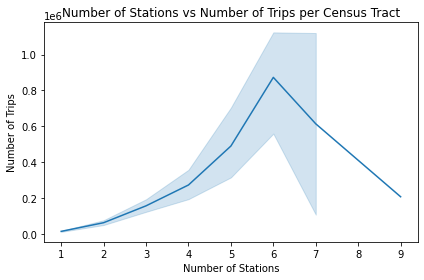

In [5]:
#removing census tracts that cover a park as they have no associated race and income information
geoid_remove = [36061014300,36047017700,36061000500,36081009900,36061031703,36047001800,36081003700]
stations_df = stations_df[stations_df['geoid'].apply(lambda x: x not in geoid_remove)]
#grouping stations data by geoid, since we want to analyze this relationship by census tract 
trip_station_geoid = stations_df.groupby('geoid')[['trips_starting_here_2017']].sum().reset_index()
num_stations_geoid = pd.DataFrame((stations_df.groupby('geoid').size())).rename(columns={0:'num_stations'}).reset_index()
trip_station_geoid = trip_station_geoid.merge(num_stations_geoid,left_on='geoid',right_on='geoid')

#plotting trips vs number of stations in each census tract
sns.lineplot(x="num_stations", y="trips_starting_here_2017", data=trip_station_geoid)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips per Census Tract")
plt.tight_layout()
plt.show()

Looking at the line graph, we see that initially as the number of stations in a census tract increases, the number of trips taken from the census tract also increases. However, starting from locations that have seven stations, as the number of stations inceases the number of trips taken decreases. Furthermore, these locations with seven, eight, and nine stations all have relatively low number of trips, meaning that perhaps too many stations are being placed at these locations relative to their use. This is suprising since we expected Citibike to distribute their stations more inline with their usage. Thus, since usage doesn't appear to be the only factor that influences where citibike stations are located, we next want to analyze the race and income distribution of these census tracts with seven, eight, and nine stations to see wether there are any trends in their race and income distribution that can explain the reason why Citibike decided to place a large number of stations in these areas where there is little usage. 

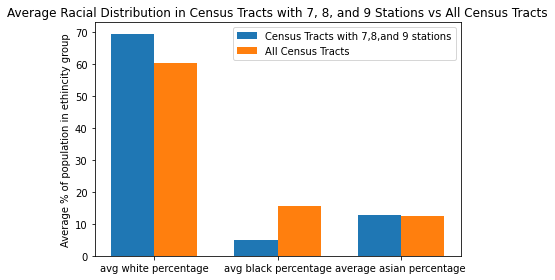

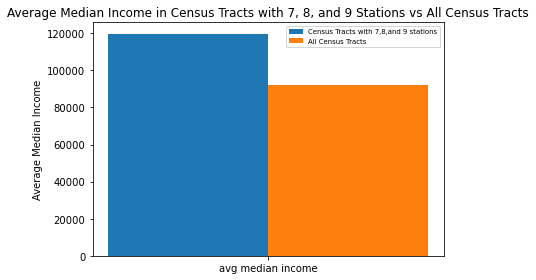

In [6]:
#obtaining the proportion of each racial category in the census tracts 
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
#Selecting the race and income information for census tracts that have 7, 8, and 9 stations
selector = trip_station_geoid[trip_station_geoid['num_stations'].apply(lambda x: x in [7,8,9])]['geoid']
most_stations_ri = race_income_df[race_income_df['geoid'].apply(lambda x: x in list(selector))]
most_stations_race_means = np.array(most_stations_ri.mean(axis=0).loc[['white_pct','black_pct','asian_pct']])
most_stations_income_mean = np.array(most_stations_ri.mean(axis=0).loc['2017_median_income'])
#selecting race and income rows for all census tracts that have at least one station
race_income_w_stations_df = race_income_df[race_income_df['geoid'].apply(lambda x: x in list(stations_df['geoid'].unique()))]
stations_census_tracts_race_means = race_income_w_stations_df.mean(axis=0).loc[['white_pct','black_pct','asian_pct']]
stations_census_tracts_income_mean = race_income_w_stations_df.mean(axis=0).loc['2017_median_income']

def plot_bar(labels,data1,data2,ylabel,title,fontsize):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, data1, width, label='Census Tracts with 7,8,and 9 stations')
    rects2 = ax.bar(x + width/2, data2 , width, label='All Census Tracts')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(fontsize= fontsize)
    fig.tight_layout()
    plt.show()

#plotting the grouped bar chart for racial ethnicities
labels = ['avg white percentage', 'avg black percentage','average asian percentage']
plot_bar(labels,most_stations_race_means,stations_census_tracts_race_means,'Average % of population in ethincity group','Average Racial Distribution in Census Tracts with 7, 8, and 9 Stations vs All Census Tracts','medium')
#plotting the grouped bar chart for racial ethnicities
labels = ['avg median income']
plot_bar(labels,most_stations_income_mean,stations_census_tracts_income_mean,'Average Median Income','Average Median Income in Census Tracts with 7, 8, and 9 Stations vs All Census Tracts','x-small')

From these bar charts, we see that the census tracts that had seven, eight, and nine stations have a much higher average median income of close to \\$120,000, compared to the average median income of \\$85,000 across all the other censust tracts that had at least one station. Furthermore, we see that the census tracts that had an unexpectedly high number of stations compared to their number of trips are predominantly white neighborhoods as their average proportion of white inidivuals in these neighborhoods is close to 70% as compared to the average white proportion across all the census tracts which is closer to 60%. Furthermore, these neighborhoods that appear to have too many stations also appear to have a very low number of black individuals with black individuals only making up on average 5% of the population of these census tracts. These results seem to indiciate that some of citibike's stations are placed not according to demand, but due to race and income factors which based on the analysis so far seems unfair. However, to see wether Citibike station placement is truly influenced by race and income instead of demand we next will look into the relationship between station placement, race, and income across all of the Citibike stations. 

### Stations vs Race and Income 

##### Here we see a consistent pattern where white majority census tracts and higher income census tracts have a higher number of stations
Chelsea fill this in with your part, but make sure you come to this conclusion. 

### Trips vs Race and Income 

Now that we have understood the relationship between the locations of Citibike stations and the race and income demographics of these locations, and more specifically that more stations are generally located in white and higher income census tracts, we want to look into the relationship between trips and race and income to see wether it is fair for more stations to be placed in white areas with higher income. To do this we will examine the the typical race and income of Citibike users. 

In [7]:
num_trips_geoid = pd.DataFrame(trips_df.groupby('start_station_geoid').size()).rename(columns={0:'num_trips_from_geoid'}).reset_index()
race_income_df = race_income_df.merge(num_trips_geoid,left_on='geoid',right_on='start_station_geoid')

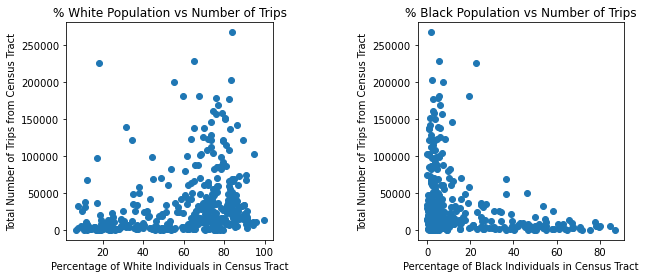

Corr between % of White individuals in a census tracts and # of trips taken from that census tract: 0.28
Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: -0.32


In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.7, hspace=None)
fig.set_figwidth(10)
ax1.scatter(race_income_df['white_pct'],race_income_df['num_trips_from_geoid'])
ax1.set_xlabel('Percentage of White Individuals in Census Tract')
ax1.set_ylabel('Total Number of Trips from Census Tract')
ax1.set_title('% White Population vs Number of Trips')
ax2.scatter(race_income_df['black_pct'], race_income_df['num_trips_from_geoid'])
ax2.set_xlabel('Percentage of Black Individuals in Census Tract')
ax2.set_ylabel('Total Number of Trips from Census Tract')
ax2.set_title('% Black Population vs Number of Trips')
plt.show()

print('Corr between % of White individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_income_df.corr()[['white_pct','black_pct']].loc['num_trips_from_geoid'][0]))
print('Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_income_df.corr()[['white_pct','black_pct']].loc['num_trips_from_geoid'][1]))

From these scatter plots we see that that as the percentage of white individuals in a census tract increase, the total number of trips taken from that census tract increases exponentially, whereas when the total number of black individuals in a census tract increases the total number of trips decreases exponentially. The shape of these graphs is also supported by the fact that there is a possitive correlation between the percentage of white individuals and the number of trips in the given area, whereas there is a negative correlation between the percentage of black individuals and the number of trips originating from this given area. Thus, from these findings it seems to make sense that Citibike is placing more emphasis on placing stations in whiter areas as these are the areas that correspond to the most usage. However, a possible limitation of this, is that these predominantly white areas have a much higher number of trips purely due to them having more stations. To address this issue, we will next normalize the number of trips taken from each geoid by the number of stations in the geoid and see how this ratio compares across all of the census tracts. 

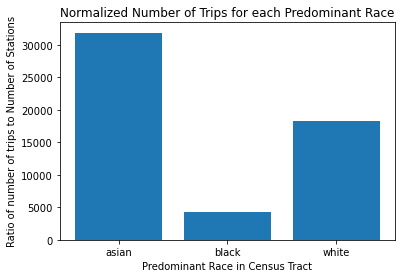

In [9]:
race_income_df = race_income_df.merge(pd.DataFrame(stations_df.groupby('geoid').size()).rename(columns={0:'num_stations_in_geoid'}).reset_index(),left_on='geoid',right_on='geoid')
#find the predominant race in each census tract
race_income_df['predominant_race']=race_income_df[['white_pct','black_pct','asian_pct']].idxmax(axis=1).apply(lambda x: 'white' if x=='white_pct' else('black' if x=='black_pct' else 'asian'))
#normalizing number of trips in each census tract by the number of stations
race_income_df['normalized_trips']=race_income_df['num_trips_from_geoid']/race_income_df['num_stations_in_geoid']
ratio_trips_stations_by_race = race_income_df.groupby('predominant_race')['normalized_trips'].mean()
plt.title("Normalized Number of Trips for each Predominant Race")
plt.ylabel("Ratio of number of trips to Number of Stations")
plt.xlabel("Predominant Race in Census Tract")
plt.bar(ratio_trips_stations_by_race.index,list(ratio_trips_stations_by_race))
plt.show()

Here we first classified each neighborhood into its predominant race based on what racial category the majority of the population in the census tract falls into. Then in order to address the previous limitation, we normalized the number of trips taken in each neighborhood by the total number of stations in the neighborhood, to account for the fact that more trips may be purely due to a higher number of stations. This bar graph shows us what is the average number of trips (after normalizing by the number of stations), taken from each of the three different neighborhood classifications. 

From this resulting bar graph, we observe that the effect we observed previously, where the number of white people in a neighborhood was positively correlated with the number of trips in the neighborhood still exists, as the average number of trips in a predominantly white neighborhood is stil higher then the average number of trips in a black neighborhood even after normalization. However, an additional insight that we get from this bar chart is that, the number of stations placed in Asian neighborhoods is way to little relative to the number of trips taken from these neighborhoods. Furthermore, it also appears that even though Citibike doesn't prioritize placing stations in Black neighborhoods, there still may be too many stations in Black neighborhoods as the ratio between the number of stations and their usage is very low. Thus, from this graph we can takeway that Citibike isn't wrong for predominantly placing stations in generally whiter areas, as white neighborhoods do have a relatively high ratio between the number of trips and the number of ratios indicating that there is a high utilization rate for the stations, however, more focus needs to be placed on creating stations in predominantly Asian areas, as the really large ratio between the number of trips in Asian areas and the number of stations indicates that there may be too little stations relative to demand. Thus, next we will look into the trend to which Citibike is buidling their stations to see wether they have identified this issue and wether they are trying to solve it.

### Predicting Where Stations Will be Made

From the previous section we saw that there are too little stations relative to demand in Asian neighborhoods, and too many stations relative to usage in predominantly black neighborhoods. Thus, ideally Citibike should recognize this issue and build stations more rapidly in predominantly Asian areas compared to White and Black areas, as these Asian neighborhoods is where the need is the greatest. To check wether they are doing this we will analyze the trend in the locations where Citibike stations have been made in the past, and look at the rate at which Citibike stations are being made in White, Asian, and Black neighborhoods. 

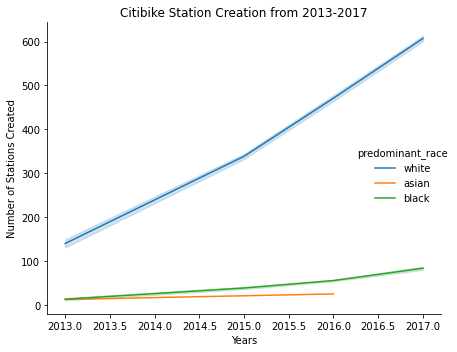

In [10]:
stations_df['first_trip']=pd.to_datetime(stations_df['first_trip'])
stations_df = stations_df.merge(race_income_df[['geoid','predominant_race']],left_on='geoid',right_on='geoid')
stations_df['cum_total_stations_per_race'] = stations_df.groupby('predominant_race')['first_trip'].rank(method='first',ascending=True)
stations_df['year_station_made'] = stations_df['first_trip'].apply(lambda x: x.year)

sns.relplot(x='year_station_made',y='cum_total_stations_per_race',hue='predominant_race',data=stations_df,kind='line')
plt.title('Citibike Station Creation from 2013-2017')
plt.xlabel('Years')
plt.ylabel('Number of Stations Created')
plt.tight_layout()
plt.show()

From this graph we see that since Citibike was started in 2013, the number of Citibike stations in majority White areas, have increased rapidly, whereas the number of Citibike stations in Asian areas, have remained constant ever since Citibike was started. Thus, this shows how Citibike has continued to emphasize creating stations in White neighborhoods, whereas there is actually a greater need for stations to be created in Asian neighborhoods. It also seems that the number of stations in Black neighborhoods, increases very slowly over time, thus the over representation of Citibikes is black neighborhoods is not due to Citibike continuing to create new stations, but it is more due to the genera lack of demand for Citibikes in black neighborhoods. (We can actually look into why this is the case). Next, we want to use Linear Regression to predict, how many stations there will be in each neighborhood in the future, and wether this would adequately cover demand. To do this we will try to predict the number of Citibike stations in each of these neighborhoods using a regression. 

In [11]:
stations_df['first_trip_numeric']  = stations_df['first_trip'].map(dt.datetime.toordinal)

In [12]:
def station_predictor_by_race(race):
    '''
    Predicts the number of stations in neighborhoods of the given predominant race in 2019-2025
    '''
    dates = pd.Series(['2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01','2025-01-01'])
    dates=pd.to_datetime(dates)
    dates  = dates.map(dt.datetime.toordinal) #convert dates to numeric so they can be used as the input to the regression
    stations_predictor = LinearRegression()
    stations_race = stations_df[stations_df['predominant_race']==race]
    stations_predictor.fit(stations_race[['first_trip_numeric']],stations_race['cum_total_stations_per_race'])
    return stations_predictor.predict(dates.values.reshape(-1,1))

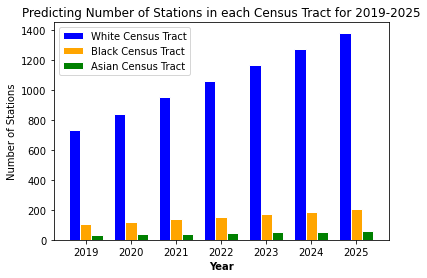

In [36]:
num_white_stations = station_predictor_by_race('white')
num_black_stations = station_predictor_by_race('black')
num_asian_stations = station_predictor_by_race('asian')
dates = [2019,2020,2021,2022,2023,2024,2025]

# set width of bars
barWidth = 0.25 
# Set position of bar on X axis
r1 = np.arange(len(num_white_stations))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, num_white_stations, color='blue', width=barWidth, edgecolor='white', label='White Census Tract')
plt.bar(r2, num_black_stations, color='orange', width=barWidth, edgecolor='white', label='Black Census Tract')
plt.bar(r3, num_asian_stations, color='green', width=barWidth, edgecolor='white', label='Asian Census Tract')
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(num_white_stations))], ['2019', '2020', '2021', '2022', '2023','2024','2025'])
plt.ylabel('Number of Stations')
plt.title('Predicting Number of Stations in each Census Tract for 2019-2025')
# Create legend & Show graphic
plt.legend()
plt.show()

When using the regression to predict the number of stations in each predominant race census tract in 2019 until 2025, we see that the number of asian and black stations would not increase drastically throughout this time period, whereas the number of stations in White census tracts increases drastically. This shows that Citibike has to change how its currently distirbuting stations and begin to focus on placing more stations in Asian neighborhoods. 